# 项目：未前往就诊的挂号预约（Kaggle数据源）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
<li><a href='#limitation'>限制</a></li>
</ul>

<a id='intro'></a>
## 简介

本数据集包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。每行数据录入了有关患者特点的多个数值，包括 “预约日期 (ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa Família 的保障人群；请注意最后一列内容的编码：“No”表示病人已如约就诊，“Yes”说明病人未前往就诊。

In [1]:
#导入分析数据必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#载入此次分析的数据集
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [3]:
#查看数据前几行
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [8]:
#修改列名以便之后调用
df.rename(columns=str.lower,inplace=True)

In [14]:
df.rename(columns={'patientid':'patient_id',
                  'appointmentid':'appointment_id',
                  'scheduledday':'scheduled_day',
                  'appointmentday':'appointment_day',
                  'no-show':'no_show'},inplace = True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
#查看数据集的中数据的唯一值
print('gender:',sorted(df.gender.unique()))
print('age:',sorted(df.age.unique()))
print('scholarship:',sorted(df.scholarship.unique()))
print('hipertension:',sorted(df.hipertension.unique()))
print('diabetes:',sorted(df.diabetes.unique()))
print('alcoholism:',sorted(df.alcoholism.unique()))
print('handcap:',sorted(df.handcap.unique()))
print('sms_received:',sorted(df.sms_received.unique()))
print('no_show:',sorted(df.no_show.unique()))

gender: ['F', 'M']
age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
scholarship: [0, 1]
hipertension: [0, 1]
diabetes: [0, 1]
alcoholism: [0, 1]
handcap: [0, 1, 2, 3, 4]
sms_received: [0, 1]
no_show: ['No', 'Yes']


In [17]:
#查看缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [18]:
#查看重复行数量
sum(df.duplicated())

0

**该数据集近11万行，14列。从上面的了解可以知道，数据没有缺失值和重复行，但是在 age 列中出现了 -1 这样的异常值，下一步我们将把这些异常值清理掉。**

### 数据清理

我们发现在 age 中最小值出现有-1这样的异常值，同时最大值达到115。虽然我们在新闻报道中见到过如此长寿的人，但是在普通数据分析时，我们更倾向于把这样的情况视为异常值，我们去掉这样的异常值还有一个很重要的原因是仅去掉最大的几个值不会对我们研究的问题有什么大的影响。

In [19]:
#删除年龄异常值
df = df[(df.age > 0) & (df.age < 100)]

In [20]:
#将scheduled_day、appointment_day两列转化为日期数据类型
df.scheduled_day = df.scheduled_day.apply(np.datetime64)
df.appointment_day = df.appointment_day.apply(np.datetime64)

/Volumes/mac_file/安装软件/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## 探索性数据分析

### 研究问题 1：性别对就诊率可能产生影响？

In [32]:
gender_df = pd.crosstab(index = df['gender'], columns = df.no_show).reset_index()
gender_df['probShowUp'] = gender_df['No'] / (gender_df['Yes'] + gender_df['No'])
gender_df

no_show,gender,No,Yes,probShowUp
0,F,55837,14272,0.796431
1,M,29462,7405,0.799143


从上面的数据我们可以比较得出，就诊率和性别没有关系。

### 研究问题 2：年龄对就诊率可能产生影响？

In [30]:
age_df = pd.crosstab(index = df['age'], columns = df.no_show).reset_index()
age_df['probShowUp'] = age_df['No'] / (age_df['Yes'] + age_df['No'])
age_df.head()

no_show,age,No,Yes,probShowUp
0,1,1858,415,0.817422
1,2,1366,252,0.844252
2,3,1236,277,0.816920
3,4,1017,282,0.782910
4,5,1169,320,0.785091


/Volumes/mac_file/安装软件/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


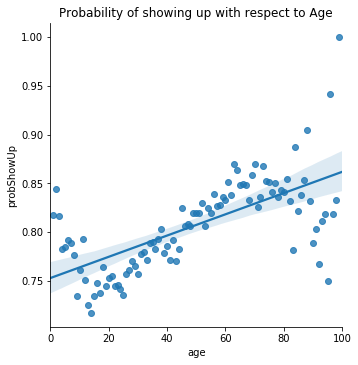

In [31]:
sns.lmplot(data = age_df[['age','probShowUp']], x = 'age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show();

我们由图表可以看出年龄和就诊率相关性较强，随着年龄的增大，就诊率逐渐升高，这可能说明人年纪越大越关注自己的健康。

### 研究问题3：高血压、糖尿病、酗酒、残疾可能对就诊率产生影响？

In [34]:
#高血压的影响
hyper_df = pd.crosstab(index = df['hipertension'], columns = df.no_show).reset_index()
hyper_df['probShowUp'] = hyper_df['No'] / (hyper_df['Yes'] + hyper_df['No'])
hyper_df

no_show,hipertension,No,Yes,probShowUp
0,0,67271,17905,0.789788
1,1,18028,3772,0.826972


In [29]:
#糖尿病的影响
diabetes_df = pd.crosstab(index = df['diabetes'], columns = df.no_show).reset_index()
diabetes_df['probShowUp'] = diabetes_df['No'] / (diabetes_df['Yes'] + diabetes_df['No'])
diabetes_df

no_show,diabetes,No,Yes,probShowUp
0,0,78786,20247,0.795553
1,1,6513,1430,0.819967


In [35]:
#酗酒的影响
alco_df = pd.crosstab(index = df['alcoholism'], columns = df.no_show).reset_index()
alco_df['probShowUp'] = alco_df['No'] / (alco_df['Yes'] + alco_df['No'])
alco_df

no_show,alcoholism,No,Yes,probShowUp
0,0,82616,21000,0.797329
1,1,2683,677,0.798512


In [36]:
#残疾的影响
hand_df = pd.crosstab(index = df['handcap'], columns = df.no_show).reset_index()
hand_df['probShowUp'] = hand_df['No'] / (hand_df['Yes'] + hand_df['No'])
hand_df

no_show,handcap,No,Yes,probShowUp
0,0,83469,21273,0.796901
1,1,1672,363,0.821622
2,2,146,37,0.797814
3,3,10,3,0.769231
4,4,2,1,0.666667


**我们可以看到，每一种疾病在纵向上的得病率对于就诊不存在影响，横向上也不存在什么关联，就诊率几乎都在0.8左右，只有残疾等级为4级的就诊率较低，我们推测可能这一等级的残疾行动不便，由此带来的就诊率较低。**

### 研究问题4：福利社保和短信接收率是否对就诊率有影响？

In [37]:
#福利社保对就诊率的影响
scho_df = pd.crosstab(index = df['scholarship'], columns = df.no_show).reset_index()
scho_df['probShowUp'] = scho_df['No'] / (scho_df['Yes'] + scho_df['No'])
scho_df

no_show,scholarship,No,Yes,probShowUp
0,0,77061,19106,0.801325
1,1,8238,2571,0.762143


In [38]:
#短信就诊率的影响
sms_df = pd.crosstab(index = df['sms_received'], columns = df.no_show).reset_index()
sms_df['probShowUp'] = sms_df['No'] / (sms_df['Yes'] + sms_df['No'])
sms_df

no_show,sms_received,No,Yes,probShowUp
0,0,60284,12109,0.832732
1,1,25015,9568,0.723332


**我们发现收到短信的人群反而就诊率更低，这里面有更多的信息需要挖掘。福利社保对就诊率没有什么影响。**

### 研究问题5：预约时间是否对就诊产生影响？

In [40]:
#我们判断星期要比日期更有分析价值，因为星期是循环的，且人们平时的工作生活很大程度上依赖于星期
df['weekday'] = df['appointment_day'].apply(lambda x : x.weekday())
df.weekday.unique()

/Volumes/mac_file/安装软件/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([4, 1, 0, 2, 3, 5])

In [42]:
week_df = pd.crosstab(index = df['weekday'], columns = df.no_show).reset_index()
week_df['probShowUp'] = week_df['No'] / (week_df['Yes'] + week_df['No'])
week_df

no_show,weekday,No,Yes,probShowUp
0,0,17387,4514,0.793891
1,1,19804,5024,0.797648
2,2,20141,4948,0.802782
3,3,13414,3242,0.805355
4,4,14523,3940,0.786600
5,5,30,9,0.769231


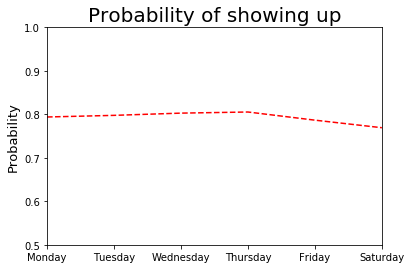

In [50]:
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
x = list(week_df['weekday'])
y = list(week_df['probShowUp'])
plt.axis([0,5,0.5,1])
plt.plot(week_day,y,'r--')
plt.ylabel('Probability',fontsize=13)
plt.title('Probability of showing up',fontsize = 20);

**由上图我们知道，医院周末不接受就诊。周一到周五就诊率相对而言变化不大，周六就诊率有所下降。**

<a id='conclusions'></a>
## 结论

通过以上分析我们得知年龄对于就诊率的影响最大，就诊的时间也会客观影响就诊率。
相对于年龄和就诊时间，福利社保、短信、各种疾病无论是在纵向还是横向上来看对于就诊率均没有什么影响。

<a id='limitation'></a>
## 限制
数据中数据较少，对于研究就诊率而言提供的信息并不充足，还需要进一步的挖掘数据来探索就诊率。